## <font color=red>**REGRESION CON REDES NEURONALES**</font>

Mediante el curso de Regresion con Redes Neuronales utilizando Numpy estaremos creando un proyecto que nos ayude a determinar el numero de bicicletas alquilidas con base en el clima y la temperatura.



---



### **CONOCIENDO EL DATASET**

In [ ]:
# 1°) Utilizaremos las siguientes bibliotecas --->

from google.colab import files # Paquete de google colab para poder importar nuestro archivo.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# 2°) Cargamos el archivo (Bicicletas) --->

files.upload()

Saving Bicicletas.csv to Bicicletas (7).csv


{'Bicicletas (7).csv': b'clima,temperatura,bicicletas_alquiladas\r\n2,0.363625,985\r\n2,0.35373899999999997,801\r\n1,0.189405,1349\r\n1,0.21212199999999998,1562\r\n1,0.22926999999999997,1600\r\n1,0.23320900000000003,1606\r\n2,0.208839,1510\r\n2,0.162254,959\r\n1,0.116175,822\r\n1,0.15088800000000002,1321\r\n2,0.19146400000000002,1263\r\n1,0.160473,1162\r\n1,0.150883,1406\r\n1,0.188413,1421\r\n2,0.248112,1248\r\n1,0.234217,1204\r\n2,0.176771,1000\r\n2,0.23233299999999998,683\r\n2,0.29842199999999997,1650\r\n2,0.25505,1927\r\n1,0.157833,1543\r\n1,0.0790696,981\r\n1,0.09883910000000001,986\r\n1,0.11793,1416\r\n2,0.234526,1985\r\n3,0.2036,506\r\n1,0.2197,431\r\n2,0.22331700000000002,1167\r\n1,0.212126,1098\r\n1,0.250322,1096\r\n2,0.18625,1501\r\n2,0.23453000000000002,1360\r\n2,0.254417,1526\r\n1,0.177878,1550\r\n2,0.22858699999999998,1708\r\n2,0.243058,1005\r\n1,0.291671,1623\r\n1,0.303658,1712\r\n1,0.198246,1530\r\n2,0.144283,1605\r\n1,0.14954800000000001,1538\r\n1,0.213509,1746\r\n1,0.23

In [ ]:
# 3°) Lo almacenamos en la Varible DATOS --->

datos = pd.read_csv("Bicicletas.csv")
datos.head()

# Vamos a tomar las Variables de Clima y Temperatura que seran nuestras variables de Entrada y la Variable Salida sera el n° de
# Bicicletas alquiladas(dependiente).

,clima,temperatura,bicicletas_alquiladas
0,2,0.363625,985
1,2,0.353739,801
2,1,0.189405,1349
3,1,0.212122,1562
4,1,0.229270,1600


In [ ]:
datos.shape

(731, 3)

In [ ]:
# 4°) Vamos a ver cuantos tipos de clima tenemos --->

datos.clima.value_counts()

# Clima 1, 2 y 3.

clima
1    463
2    247
3     21
Name: count, dtype: int64

### **VISUALIZANDO Y NORMALIZANDO LOS DATOS**

Text(0, 0.5, 'Bicicletas Alquiladas')

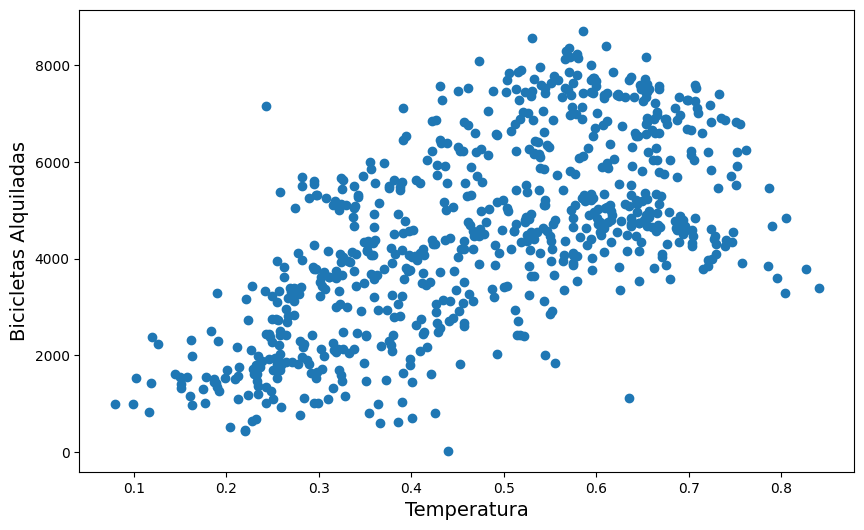

In [ ]:
# 1°9 Usamos MATPLOTLIB para visualizar los dato, graficamos TEMPERATURA y BICICLETAS ALQUILIDAS --->

plt.figure(figsize=[10,6])
plt.scatter(datos.temperatura, datos.bicicletas_alquiladas)
plt.xlabel("Temperatura", fontsize=14)
plt.ylabel("Bicicletas Alquiladas", fontsize=14)

# Vemos una Distribucion con algunos puntos mas concentrados.

Text(0, 0.5, 'Bicicletas Alquiladas')

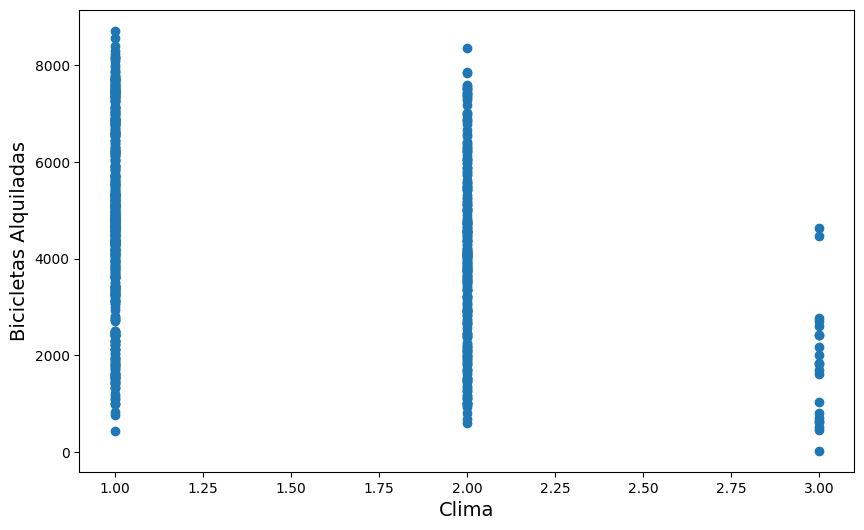

In [ ]:
# 2°) Graficamos ahora BICICLETAS ALQUILIDAS con relacion al CLIMA --->

plt.figure(figsize=[10,6])
plt.scatter(datos.clima, datos.bicicletas_alquiladas)
plt.xlabel("Clima", fontsize=14)
plt.ylabel("Bicicletas Alquiladas", fontsize=14)

In [ ]:
# 3°) NORMALIZAMOS nuestros datos, tomamos todos los valores y lo colocamos entre 0 y 1, creamos la Variable X que
# va a ser nuestra matriz con que van a tener los valores de nuestros datos --->

X = datos[["clima", "temperatura"]].values
y = datos["bicicletas_alquiladas"].values
print(X[:5], y[:5])

# Vemos los valores en la matriz de nuestras Variables.

[[2.       0.363625]
 [2.       0.353739]
 [1.       0.189405]
 [1.       0.212122]
 [1.       0.22927 ]] [ 985  801 1349 1562 1600]


In [ ]:
# 4°) NORMALIZAMOS los valores para que esten entre 0 y 1 ---->

X = X/np.amax(X, axis=0)# Tomamos la X y le decimos que tome el valor de la fila y luego deivida por el valor MAXIMO de esa columna.
ymax = np.max(y)
y = y/ymax
print(X[:5], y[:5]) # Imprimimos los valores NORMALIZADOS, valores entre 0 y 1.

[[0.66666667 0.43242565]
 [0.66666667 0.42066914]
 [0.33333333 0.22524188]
 [0.33333333 0.25225712]
 [0.33333333 0.27264965]] [0.11303649 0.09192105 0.15480835 0.17925178 0.18361258]


**Dato:**

***Para saber más: Uso compartido de bicicletas***

La base de datos que estamos usando está basada en Bike Sharing Dataset, obtenida a partir de sistemas de uso compartido de bicicletas que son formas diferentes de alquilar bicicletas, en que el proceso de asociación, alquiler y devolución es automático. Así, un usuario puede alquilar una bicicleta a partir de una determinada posición y devolver en otra posición. Los datos provenientes de estos sistemas son muy interesantes para las investigaciones en ciencia de datos y aprendizaje de máquina (el famoso machine learning). Además de la información usada en el curso, se registra la información relacionada a la posición de partida y llegada de cada usuario lo cual no ocurre con otras formas de transporte como el bus o el metro, por ejemplo. Ello hace que el sistema de uso compartido de bicicletas sea una forma eficiente de estudiar la mobilidad en una ciudad.

En el artículo de Fanaee-T. y Gama (2013), esta base de datos fue utilizada para estudiar un algoritmo de etiquetado de eventos, es decir, si ocurrió un préstamo de bicicleta o no. Los resultados mostraron que el algoritmo propuesto puede ser una alternativa viable en la falta de humanos entrenados en el asunto.

Referencia Bibliográfica

Fanaee-T., Hadi, and Gama, João. 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg. doi:10.1007/s13748-013-0040-3.

## <font color=red>**LA ESTRUCTURA DE LA RED NEURONAL**</font>


---



### **ENTENDIENDO REDES NEURONALES**


### **FUNCION DE ACTIVACION Y ARQUITECTURA DE LA RED**

Primero vamos a crear las FUNCIONES de ACTIVACION y de la misma manera la ARQUITECTURA para poder inicializar nuestras Capas.

In [ ]:
# 1°) Vamos a crear la FUNCION SIGMOIDE y la FUNCION RELU --->

def sigmoid(suma): # Esta funcion sigmoid devuelve:
  return 1/(1 + np.exp(-suma))

def relu(suma):
  return np.maximum(0, suma) # Relu es unicamente el valor Maximo de x, de 0 a x.

In [ ]:
# 2°) Ahora hacemos la ARQUITECTURA, que basicamente es la CAPA de ENTREDA, CAPAS OCULTAS, y la CAPA de SALIDA, creamos una Lista Arquietectura
# y le colocamos 2 elementos y cada uno va a corresponder a una de estas conexiones, el Primer elemento es la conexion entre la Capa de Entrada
# y la Capa Oculta, la Segunda conexion es desde la Capa Oculta hasta la Capa de Salida, y lo haremos a traves de un Diccionario --->

arquitectura = [
    {"dim_in":2, "dim_out":50, "activacion":"relu"}, # Dimensiones de Entrada=2, Dimensiones de Salida=50 Nodos en la Capa Oculta
    {"dim_in":50, "dim_out":1, "activacion":"sigmoid"} # Dimensiones de Entrada=50 capa oculta se convierte en capa dimension entrada, Capa Salida=1
]

In [ ]:
# 3°) Luego de tener la ARQUITECTURA vamos a iniciar nuestras Capas --->

def inicia_capas(arquitectura, seed=99): # Seed=Para obtener los parametros de forma aleatoria.
  np.random.seed(seed)
  numero_capas = len(arquitectura)
  valores_parametros={} # Diccionario donde almacenamos valores.
  for indice, capa in enumerate(arquitectura): # Recorremos el Indice y la Capa en la arquitectura.
    indice_capa = indice + 1
    tamano_capa_in = capa["dim_in"]
    tamano_capa_out = capa["dim_out"]
    valores_parametros["P" + str(indice_capa)] = np.random.randn(tamano_capa_out, tamano_capa_in)*0.1 # P=Peso.
    valores_parametros["b" + str(indice_capa)] = np.random.randn(tamano_capa_out, 1 )*0.1 # b=Bias
  return valores_parametros

# DE ESTA MANERA TENEMOS LA FUNCION QUE INICIA LAS CAPAS.

### **PROPAGACION DE RED**

Vemos a definir una funcion para realizar la PROPAGACION en una Capa, esto para luego hacer la PROPAGACION TOTAL de toda la Red. Implementamos la Funcion Suma y luego aplicamos una funcion de Activacion.

In [ ]:
# 1°) Definimos la Funcion y va a recibir Parametros como ACTIVACION_ANTERIOR(valor de X), PESO ACTUAL, BIAS_ACTUAL y FUNCION de
# ACTIVACION("Relu") ---->

# PROPAGACION UNA CAPA:
def propaga_una_capa(activacion_anterior, pesos_actual, b_actual, activacion="relu"):
  output_actual = np.dot(pesos_actual, activacion_anterior) + b_actual # DOT=Multiplicacion de Matrices
  if activacion == "relu":
    func_activacion = relu
  elif activacion == "sigmoid":
    func_activacion = sigmoid
  else:
    raise Exception("Funcion NO Implementada")
  return func_activacion(output_actual), output_actual

In [ ]:
# 2°) Lo siguiente que hacemos en la Propagacion Total --->

# PROPAGACION TOTAL:
def propaga_total(X, valores_aparametros, arquitectura): # Valores_Parametros=Valores calculados anteriormente de forma Aleatoria.
  memoria = {} # Creamos Diccionario para almacenar los Valores.
  activacion_actual = X
# ITERAMOS TODOS NUESTROS DATOS:
  for indice, capa in enumerate(arquitectura):
    indice_capa = indice + 1
    activacion_anterior = activacion_actual
    func_activacion_actual = capa["activacion"]
    pesos_actual = valores_parametros["P" + str(indice_capa)]
    b_actual = valores_parametros["b" + str(indice_capa)]
    activacion_actual, output_actual = propaga_una_capa(activacion_anterior, pesos_actual, b_actual, func_activacion_actual)
    memoria["A" + str(indice)] = activacion_anterior
    memoria["Z" + str(indice_capa)] = output_actual
  return activacion_actual, memoria


**Definicion:**

**Cálculos en la red**

Vimos que es posible escribir los pesos y los bieses de la red neuronal de forma resumida en matrices. Ello deja la implementación más fácil y hace que el código funcione de manera eficiente. Observa el siguiente trecho de código:

***output_actual = np.dot(Pesos_actual, Activacion_anterior) + b_actual***

**¿Qué cálculo se está realizando?**

* Es el cálculo de propagación de la red que incluye la multiplicación de la matriz de pesos por la matriz de valores de activación de la capa anterior, y el resultado anterior sumado a la matriz de bieses.
Muy bien, esta es la forma de calcular la salida actual.

### **PROBANDO LA RED**

Vamos a probar como quedo nuestra Propagacion, que nos arroja como resultado al utilizar valores Aleatorios como parametro.

In [ ]:
# 1°) Vamos a iniciar nuestros VALORES PARAMETROS y le aplicamos la funcion INICIA_CAPAS y le colocamos ARQUITECTURA y SEED=99,
# luego creamos Y ESTIMADO que es la Salida que fue estimada y en MEMORIA vamos a almacenar los valores de PROPAGACION_TOTAL, con
# los parametros de Entrada que es el CLIMA y TEMPERATURA, VALORES_PARAMETROS y ARQUITECTURA --->

valores_parametros = inicia_capas(arquitectura, seed=99)
y_estimado, memoria = propaga_total(np.transpose(X), valores_parametros, arquitectura)

In [ ]:
# 2°) Vemos nuestro Y_ESTIMADO --->

y_estimado[0,0]*ymax # [0.0] en un punto especifico y lo multiplicamos por el YMAXIMO para ver que nos arroja.

# Nos ESTIMA 4579 Bicicletas.

4579.982967258466

In [ ]:
# 3°) Ahora vemos el valor Real en ese mismo punto --->

y[0]*ymax

# El valor REAL es de 985 Bicicletas.

985.0000000000001

* ***El valor de Bicicletas ESTIMADA no es el REAL, por lo tanto hay un ERROR muy grande que lo que debemos hacer ahora es tomar ese ERROR y aplicarlo en una Funcion de COSTO y con base en este ERROR nosotros vamos a hacer una RETROPROPAGACION de nuestra RED y vamos a ir desde la SALIDA hacia atras y recorrerla con este ERROR, propagando y midiendolo para obtener nuevos valores y estas ITERACIONES son las que nos van a permitir tener una Red Neuronal mas PRECISA.***

**Definicion:**

***Error en la red***

Al realizar la propagación en la red con valores aleatorios, los resultados presentan error. Esto quiere decir que:

*
Este error es un parámetro necesario ya que nos permitirá hacer una retropropagación a la red para poder actualizar los valores de pesos y bieses y progresivamente ir mejorando la red neuronal.
Es una forma resumida de explicar los siguientes pasos en la aplicación de redes neuronales.

## <font color=red>**ANALISIS Y ACTUALIZACION DE LA RED**</font>


---

### **FUNCION DE COSTO Y RETROPROPAGACION**


**Definicion:**

***La función de costo***

La función de costo utiliza como parámetro(s):

* La salida y la salida estimada.
  Así es, se tienen en cuenta la salida Y y la salida estimada Y_estimado.

### **ACTUALIZACION DE PESOS Y FUNCION DE COSTO**

Vamos a Implementar la ecuacion al codigo, para la actualizacion de PESOS entre la capa de Salida y la capa Oculta que se encuentra inmediatamente antes y la funcion de Costo.

* Funcion Peso: <font color=orage>P1 = P0 - α∇p</font>

* Funcion Costo: <font color=orage>-(Y log ŷ + (1 - Y) log(1 - ŷ))</font>

In [ ]:
# 1°) Para actualizar los PESOS entre la Capa de SALIDAy las Capas OCULTAS, vamos a definir la siguiente funcion --->

# P1 = P0 - α∇p:
def actualiza(valores_parametros, gradientes, arquitectura, tasa_aprendizaje): # Funcion actualiza que recibe 4 parametros.
  for indice_capa, capa in enumerate(arquitectura, 1): # Iteramos.
    valores_parametros["P" + str(indice_capa)] -= tasa_aprendizaje * gradientes["dP" + str(indice_capa)] # Para el valor de PESO, DP= Derivada Peso.
    valores_parametros["b" + str(indice_capa)] -= tasa_aprendizaje * gradientes["db" + str(indice_capa)] # Para el valor de BIAS, Db= Derivada Bias.
    return valores_parametros


In [ ]:
# 2°) Tambien debemos implemantar nuestra Funcion de COSTOS, pero para ello debemos tomar todas las muetras, es decir, tomar la funcion
# de COSTO y dividirla por el valor total de nuestras Bicicletas Alquiladas --->

# -(Y log ŷ + (1 - Y) log(1 - ŷ)):
def valor_costo(Y_estimado, Y): # Funcion valor_costo que recibe 2 parametros.
  m = Y_estimado.shape[1] # Valor total de Y_estimado.

  costo = -1 / m * (np.dot(Y, np.log(Y_estimado).T) + np.dot(1 - Y, np.log(1 - Y_estimado).T)) # -1/m*= Dividimos por m que son la cantidad de muestras.
  return np.squeeze(costo) # Quitamos una dimension extra que NO necesita.

# agregamos la TRASPUESTA al codigo para que puedan operar y y y_estimado

**Definicion:**

***Realizando un estimado***

Construimos la estructura de la red neuronal y logramos emplearla para nuestra primera estimativa del número de bicicleta alquiladas.

***¿Qué herramienta podríamos utilizar para cuantificar si contamos con un buen estimado de número de bicicletas alquiladas?***

* Una función de costo para medir la diferencia entre el número conocido de bicicletas alquiladas y el número estimado de las mismas.
La función de costo será usada durante la corrección de los pesos, como una forma de medir si nos estamos aproximando de la respuesta deseada. Queremos disminuir la diferencia entre la respuesta conocida y la estimada.

**Dato:**

***El gradiente descendiente***

El algoritmo que empleamos para actualizar los pesos de la red recibe el nombre de <font color=orage>Gradiente Descendiente</font> y es el más usado en machine learning, aunque existen algunas variaciones del mismo.

La idea de aplicación del gradiente descendiente es la minimización de la función de costo. Esto significa encontrar el punto donde la función de costo posee el menor valor. Este valor será mínimo cuando nuestro número de bicicletas alquiladas estimado sea lo más cercano posible al número conocido de bicicletas alquiladas. A través de la matemática, sabemos que el ángulo de descenso de una función es la derivada de la función con respecto a un determinado valor. Para nuestro caso, queremos derivar la función de costo con relación a los pesos, o con relación al valor estimado que es dependiente de los pesos. Queremos saber en que dirección debemos actualizar los pesos para que el costo disminuya. A continuación se ilustra la función de costo con respecto a los pesos mostrando el gradiente de un punto.

Debemos tener en mente que conforme avanzamos en la función, el ángulo de descenso cambia. Por ello, el algoritmo de gradiente descendiente se aplica de forma iterativa. Andamos un paso en la función y actualizamos los pesos. Posteriormente, andamos un paso más y verificamos si progresamos. El avance en cada paso es la tasa de aprendizaje. la medida de la tasa de aprendizaje es importante. Si escogemos una tasa de aprendizaje muy alta, podemos sobrepasar el punto mínimo, y nunca llegar a este valor. Aunque su elección sea en muchos casos mediante prueba y error, la tasa de aprendizaje puede escogerse de forma sistemática. Un valor óptimo puede obtenerse como siendo aquel que proporciona la mayor diferencia entre dos valores de costo consecutivos. Adicionalmente, en algunos casos, la tasa de aprendizaje puede ser actualizada durante la aplicación del algoritmo de gradiente descendiente. Disminuimos el valor de la tasa de aprendizaje poco a poco conforme nos aproximamos al punto de mínimo de la función de costo.

## <font color=red>**RETROPROPAGACION**</font>

Vamos a evaluar como efectuaremos las DERIVADAS, la Derivada es el angulo de la pendiente de nuestra Funcion, para saber la razon de cambio en ese punto especifico y lo que tenemos es buscar los Minimos Globales.

Para PROPAGACION se usan N Funciones Compuestas. Para la RETROPROPAGACION hay que Derivar todas estas funciones compuestas, lo que nos lleva a aplicar la REGLA de la CADENA.

***Detivada del PESO, Derivada del BIAS, Derivada de la Funcion SUMA(z), Derivada de la Funcion de Activacion.*** (Ver formulas en Cuadernillo)


---

### **RETROPROPAGACION**

In [ ]:
# 3°) Vamos a crear nuestra Funcion de RETROPROPAGACION utilizando las formulas a traves de NUMPY --->


def retropropaga_total(Y_estimado, Y, memoria, valores_parametros, arquitectura):
##Creamos diccionario donde almacenaremos las Derivadas:
  gradientes = {}
  Y = Y.reshape(Y_estimado.shape)# Para que los 2 vectores tengan la misma dimension.

  dActivacion_anterior = -(np.divide(Y, Y_estimado) - np.divide(1 - Y, 1 - Y_estimado)) # Derivada de la Activacion anterior.

  for indice_capa_anterior, capa in reversed(list(enumerate(arquitectura))): #Recorrer la Lista al reves, proceso Inverso a la Propagacion.
    indice_capa_actual = indice_capa_anterior + 1
    func_activacion_actual = capa["activacion"]
    dActivacion_actual = dActivacion_anterior
    activacion_anterior = memoria["A" + str(indice_capa_anterior)]
    output_actual = memoria["Z" + str(indice_capa_actual)]
    pesos_actual = valores_parametros["P" + str(indice_capa_actual)]
    b_actual = valores_parametros["b" + str(indice_capa_actual)]
    dActivacion_anterior, dPesos_actual, db_actual = retropropaga_una_capa(dActivacion_actual, pesos_actual, b_actual, output_actual,
                                                                           activacion_anterior, func_activacion_actual)
    gradientes["dP" + str(indice_capa_actual)] = dPesos_actual
    gradientes["db" + str(indice_capa_actual)] = db_actual
  return gradientes

###**ACTIVACION EN RETROPROPAGACION**

In [ ]:
# 4°) Ahora vamos a hacer la Derivada de las Funciones de ACTIVACION para la RETROPROPGACION(Sigmoid-Relu) --->

def sigmoid_retro(dActivacion, output):
  sig = sigmoid(output)
  return dActivacion * sig * (1 - sig)

def relu_retro(dActivacion, output):
  dOutput = np.array(dActivacion, copy=True)
  dOutput[output <=0] = 0
  return dOutput

###**RETROPROPAGACION EN UNA CAPA**

Creamos la Funcion para la RETROPROPAGACION en 1 capa utilizando todas las Funciones de Derivadas.

In [ ]:
# 5°) Definimos la Funcion de RETROPROPAGACION en 1 capa con ACTIVACION RELU ---->

def retropropaga_una_capa(dActivacion_actual, pesos_actual, b_actual, output_actual,
                          activacion_anterior, activacion ="relu"):

  m = activacion_anterior.shape[1] # Definimos m, el valor de la cantidad de muestras de la Activacion anterior.

  if activacion == "relu":
    func_activacion_retro = relu_retro
  elif activacion == "sigmoid":
    func_activacion_retro = sigmoid_retro
  else:
    raise Exception("Funcion NO Implementada")

# Colocamos las Derivadas, utilizando las Formulas:
  dOutput_actual = func_activacion_retro(dActivacion_actual, output_actual) # Derivada de la Salida Actual.
  dPesos_actual = np.dot(dOutput_actual, activacion_anterior.T)/m # Derivada de Peso Actual.
  db_actual = np.sum(dOutput_actual, axis=1, keepdims=True)/m # Derivada de Bias Actual.
  dActivacion_actual = np.dot(pesos_actual.T, dOutput_actual) # Derivada de Activacion Anterior.

  return dActivacion_actual, dPesos_actual, db_actual


**Definicion:**

**Actualización de los pesos**

Anakin estaba construyendo un algoritmo para la actualización de los pesos de una red neuronal. Él percibió que, además del tamaño del paso que será dado a cada iteración, tendría que hacer otra estimativa dentro del algoritmo de actualización de pesos.

***¿Cuál es dicha estimativa y cómo se realiza?***

* Hacemos la estimativa del gradiente. Esta estimativa se hace a través del algoritmo de retropropagación.
Es común confundir el algoritmo del gradiente descendiente con el de retropropagación. El gradiente descendiente es utilizado para la actualización de los pesos, y la retropropagación es utilizada para obtener el gradiente empleado dentro del algoritmo de gradiente descendiente.

**Dato:**

***Para saber más: Sobre tensores***

* Vimos uma forma de almacenar los pesos en matrices y como ello nos permite escribir la cuenta de propagación en cada capa resumidamente, además de facilitar la aplicación del algoritmo de retropropagación – Lo cual es importante porque una red neuronal puede tener diversas capas con diversos nodos. Todo ello, además de las grandes bases de datos que son utilizadas en aprendizaje de máquina, consume poder computacional.

 Para tornar la resolución de problemas de aprendizaje de máquina más fácil, el equipo Google Brain desarrollo TensorFlow, una biblioteca de software para la computación numérica. TensorFlow es un framework que define y ejecuta cálculos que envuelven tensores. Un tensor es una generalización de vectores y matrices para dimensiones superiores a 1D o 2D. Adicionalmente, TensorFlow puede ser usado en diversas plataformas, como GPUs (graphics processing unity – unidades de procesamiento gráfico) y TPUs (tensor processing unit – unidades de procesamiento de tensores), sacando provecho de las mismas. Las GPUs son microprocesadores desarrollados especialmente para procesar gráficos y poseen una estructura de procesamiento paralelo. Ya una TPU es un microprocesador acelerador de inteligencia artificial, que fue desarrollado por Google específicamente para aprendizaje de máquinas.


## <font color=red>**ENTRENAMIENTO**</font>

Entonces vamos a ver rápidamente nuestra red de forma global. Tenemos como entradas nuestro <font color=orage>Clima y Temperatura</font>, que serían nuestras variables que están en la <font color=orage>Capa de Entrada.</font>

Realizamos entonces la <font color=orage>Propagación en la red</font>. Y después de propagar en la red con los valores aleatorios utilizando NumPy random, entonces medimos el <font color=orage>Error</font> y con este error entonces procedemos a realizar la <font color=orage>Retropropagación de la red</font>. Con esa retropropagación vamos entonces a actualizar los pesos y con estos <font color=orage>Pesos Actualizados</font> volvemos a propagar en la red y medimos el error para retropropagar en la red nuevamente y actualizar los pesos.

Como ustedes observan, aquí vamos a tener un número de iteraciones que nosotros es un parámetro que vamos a definir para que nuestra red entonces pueda actualizar sus pesos y disminuir costos, que eso es lo que queremos.

Queremos también disminuir la entropía para que de esta forma nuestros valores estén más acordes, nuestros valores estimados estén más acordes con los valores reales de las bicicletas alquiladas y, finalmente, antes de ir allí, toda esta cantidad de iteraciones las vamos a denominar <font color=orage>Epocas</font>, y finalmente, vamos entonces a obtener nuestro número de bicicletas alquiladas de acuerdo con lo que deseamos, de acuerdo con el objetivo de nuestro proyecto.


---



###**ENTRENAMIENTO DE LA RED PARTE 1**

In [ ]:
# 6°) Vamos a Entrenar nuestra Red, definimos una Funcion --->

def train(X, Y,X_test,Y_test, arquitectura, epocas, tasa_aprendizaje):
    valores_parametros = inicia_capas(arquitectura, 2) # Inicia los parámetros de la red neuronal, 2=seed
    # Listas que almacenarán el aprendizaje de la red, los costos y valore que estaremos usando en Prueba.
    historia_costo = []
    historia_costo_test = []


    # Actualiza los valores en cada época, cada Iteracion:
    for i in range(epocas):
        # Propagación de la red - Forward propagation
        Y_estimado, memoria = propaga_total(X, valores_parametros, arquitectura)
        Y_estimado_test, memoria2 = propaga_total(X_test, valores_parametros, arquitectura) # Valores de Prueba.

        # calcula as métricas y salva las listas de história:
        costo = valor_costo(Y_estimado, Y) # Calculamos el Costo.
        historia_costo.append(costo) # A la lista le agregamos valor de Costos.
        costo_test = valor_costo(Y_estimado_test, Y_test) # Prueba
        historia_costo_test.append(costo_test)

        # Retropropagación - Backpropagation:
        gradientes = retropropaga_total(Y_estimado, Y, memoria,
                                           valores_parametros, arquitectura)
        # Actualizar los pesos
        valores_parametros = actualiza(valores_parametros, gradientes,
                                      arquitectura, tasa_aprendizaje)

        # Imprime Iteraciones:
        if(i % 50 == 0):

            print(f'Iteración: {i:05} - Costo: {costo:.5f}')


    return valores_parametros, historia_costo, historia_costo_test

In [ ]:
# 7°) Separamos nuestra Base de ENTRENAMIENTO y Base de PRUEBA --->

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.43, random_state=42)

**Definicion:**

**Visión general de la red**

***¿Cómo se denomina el ciclo de lazo entre la propagación de la red, el error, retropropagación, actualización de pesos?***

* EPOCAS, este parámetro nos permite determinar el mejor número de iteraciones para el aprendizaje de la red.

###**ENTRENAMIENTO DE LA RED PARTE 2**

In [ ]:
# 8°) Vamos a ejecutar la Funcion TRAIN ---->

valores_parametros, historia_costo, historia_costo_test = train(np.transpose(X_train), np.transpose(y_train.reshape((y_train.shape[0], 1))),
                                                                  np.transpose(X_test), np.transpose(y_test.reshape((y_test.shape[0], 1))),
                                                                  arquitectura, 20000, 0.01) # Transpuesta de X, para convertir fila en Columna.
                                                                  # 20000=Epocas, reshape=dimensiones, 0.01=Taza de aprendizaje.

# El COSTO va disminuyendo con cada Iteracion(epocas 20000).

Iteración: 00000 - Costo: 0.69384
Iteración: 00050 - Costo: 0.69384
Iteración: 00100 - Costo: 0.69384
Iteración: 00150 - Costo: 0.69384
Iteración: 00200 - Costo: 0.69384
Iteración: 00250 - Costo: 0.69384
Iteración: 00300 - Costo: 0.69384
Iteración: 00350 - Costo: 0.69384
Iteración: 00400 - Costo: 0.69384
Iteración: 00450 - Costo: 0.69384
Iteración: 00500 - Costo: 0.69384
Iteración: 00550 - Costo: 0.69384
Iteración: 00600 - Costo: 0.69384
Iteración: 00650 - Costo: 0.69384
Iteración: 00700 - Costo: 0.69384
Iteración: 00750 - Costo: 0.69384
Iteración: 00800 - Costo: 0.69384
Iteración: 00850 - Costo: 0.69384
Iteración: 00900 - Costo: 0.69384
Iteración: 00950 - Costo: 0.69384
Iteración: 01000 - Costo: 0.69384
Iteración: 01050 - Costo: 0.69384
Iteración: 01100 - Costo: 0.69384
Iteración: 01150 - Costo: 0.69384
Iteración: 01200 - Costo: 0.69384
Iteración: 01250 - Costo: 0.69384
Iteración: 01300 - Costo: 0.69384
Iteración: 01350 - Costo: 0.69384
Iteración: 01400 - Costo: 0.69384
Iteración: 014

**Definicion:**

**División entre base de entrenamiento y base de pruebas**

***¿Cuál es el parámetro que se debe ajustar al utilizar la función train_test_split() de Scikit Learn para seleccionar el tamaño de la base de pruebas?***

* **El parámetro test_size.** Efectivamente este parámetro nos permite ajustar el tamaño de la base de pruebas.

###**REALIZANDO PREVISIONES**

Vamos a ver de que manera se comporta nuestro sistema, graficamos como nuestra Red Neuronal se comporta

In [ ]:
# 9°) Creamos variable Y_pred y le asigamos la funcion Propaga_total --->

# Previsión
Y_pred, _ = propaga_total(np.transpose(X_test), valores_parametros, arquitectura) # Transpose para covertir los valores de Clima y Temperatura.

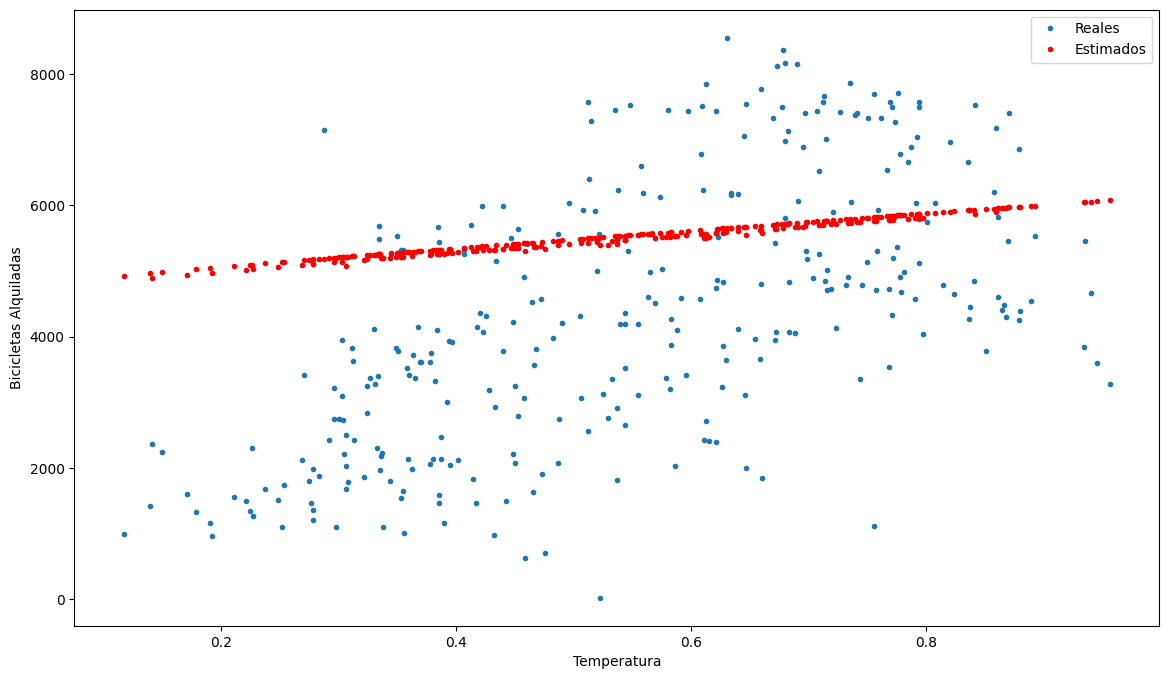

In [ ]:
# 10°) Hacemos nuestro grafico de clima y temperatura(plot) --->

plt.figure(figsize=[14,8])
plt.plot(np.transpose(X_test)[1],ymax*y_test,'.') # [1]= Elemento Temperatura
plt.plot(np.transpose(X_test)[1],ymax*Y_pred.reshape([-1,1]),'.r')
plt.legend(['Reales','Estimados'])
plt.ylabel('Bicicletas Alquiladas')
plt.xlabel('Temperatura')
plt.show()

  Nuestra REGRESION, acompaña la distribucion, sirve para ilustrar que nuestra Red Neuronal esta aprendiendo.

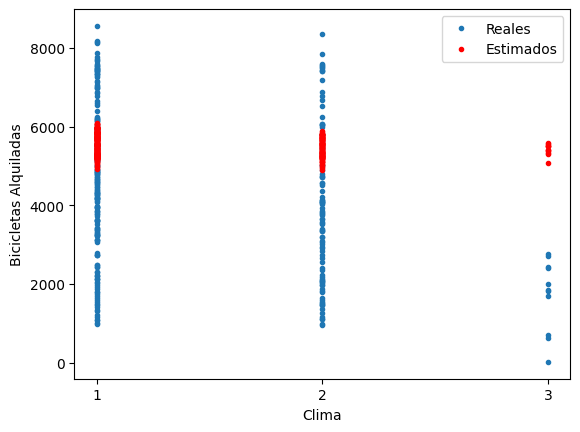

In [ ]:
# 11°) Graficamos el Clima --->

plt.plot(3*np.transpose(X_test)[0],ymax*y_test,'.')
plt.plot(3*np.transpose(X_test)[0],ymax*Y_pred.reshape([-1,1]),'.r')
plt.legend(['Reales','Estimados'])
plt.ylabel('Bicicletas Alquiladas')
plt.xlabel('Clima')
indice=[1,2,3]
plt.xticks(indice)
plt.show()

En el CLIMA 1 la concentracion se asemeja bastante al igual que en el CLIMA 2 la concentracion de Bicicletas Alquiladas esta dentro de los que hay y el CLIMA 3 hay algunas que estan por fuera de lo valores ESTIMADOS.

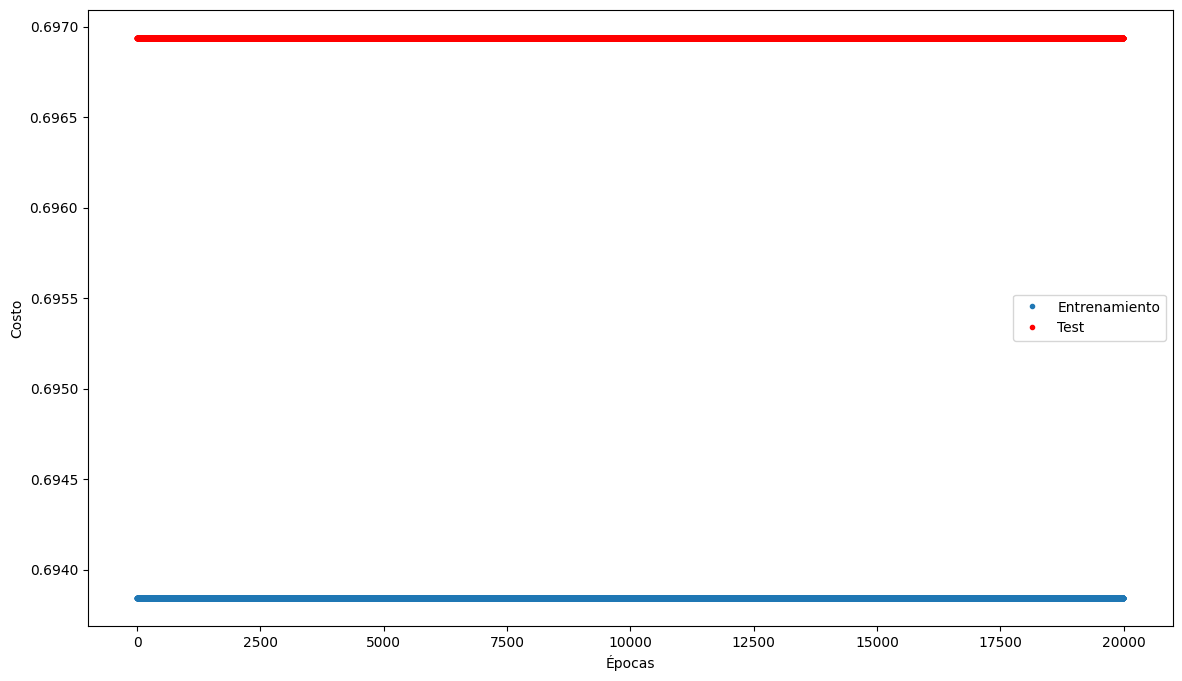

In [ ]:
# 12°) Podemos tambien hacer un PLOT del COSTO --->

plt.figure(figsize=[14,8])
plt.plot(historia_costo, ".")
plt.plot(historia_costo_test, '.r')
plt.legend(['Entrenamiento','Test'])
plt.ylabel('Costo')
plt.xlabel('Épocas')
plt.show()

La grafica nos muestra el ENTRENAMIENTO a medida que se entrena el va tendiendo a mejorar y en la PRUEBA se adecua bien. Si modificamos ls arquitectura de la Red, en vez de tener 50 Nodos en "dim_out":50 en la capa oculta y ponemos 3, y en "dim_in":50 tambien colocamos 3 Nodos, vemos que NO aprende rapido , recien a partir de los 17500 epocas y esos 3 Nodos NO  serian suficiente.